# EDA - Exploratory Data Analysis

Etapa en la que se llevara a cabo un análisis exhaustivo de los datos. Entre los aspectos destacados que se deben abordar en esta etapa se encuentran: 
- La busqueda de valores faltantes.
- Tratamiento de valores faltantes.
- Valores atipicos/extremos o outliers.
- Registros duplicados.  

#### Importamos las librerias necesarias:

In [116]:
import pandas as pd
import FuncionesExtra as f
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#### Leemos el dataset:

In [117]:
homicidios = pd.read_excel('Data/homicidios.xlsx', sheet_name= None)

#### Análisis exploratorio del dataset:

*Visualizamos las hojas disponibles en el archivo:*

In [118]:
f.hojas_archivo_excel(homicidios)

HECHOS
DICCIONARIO_HECHOS
VICTIMAS
DICCIONARIO_VICTIMAS
clas


*Nos quedamos con las hojas necesarias del archivo, contenidas en un DataFrame y visualizamos de manera resumida como se conforma:*

In [119]:
homicidios_hechos = homicidios['HECHOS']

In [120]:
homicidios_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [121]:
homicidios_victimas = homicidios['VICTIMAS']

In [122]:
homicidios_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


*Visualizamos los diccionarios para entender mejor de que trata y que contiene cada DataFrame:*

In [123]:
diccionario_hechos = homicidios['DICCIONARIO_HECHOS']

diccionario_hechos

,variables y definiciones,descripción,Unnamed: 2
0,ID,identificador unico del siniestro,NaN
1,N_VICTIMAS,cantidad de víctimas,NaN
2,FECHA,fecha en formato dd/mm/aaaa,NaN
3,AAAA,año,NaN
4,MM,mes,NaN
5,DD,día del mes,NaN
6,HORA,hora del siniestro,NaN
7,HH,franja horaria entera,NaN
8,LUGAR_DEL_HECHO,Dirección del hecho,NaN
9,TIPO_DE_CALLE,Tipo de arteria. En el caso de intersecciones ...,NaN


In [124]:
diccionario_victimas = homicidios['DICCIONARIO_VICTIMAS']

diccionario_victimas

,variables y definiciones,descripción,Unnamed: 2
0,ID_hecho,identificador unico del siniestro,NaN
1,FECHA,fecha en formato dd/mm/aaaa,NaN
2,AAAA,año,NaN
3,MM,mes,NaN
4,DD,día del mes,NaN
5,ROL,Posición relativa al vehículo que presentaba l...,NaN
6,VICTIMA,Vehículo que ocupaba quien haya fallecido a se...,NaN
7,SEXO,Sexo informado por fuente policial de la víctima,NaN
8,EDAD,Edad de la víctima al momento del siniestro,NaN
9,FECHA_FALLECIMIENTO,Fecha de fallecimiento de la víctima,NaN


#### Análisis exploratorio del DataFrame **homicidios_hechos**:

#### Información general:

*Podemos visualizar el nombre de las columnas, la cantidad de valores **Non-Null** por columna y el tipo de dato de cada columna:*

In [125]:
homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

#### Normalizamos las columnas del DataFrame:

*De esta manera normalizamos la primer letra de cada palabra en los nombres de cada columna (primer letra mayuscula de cada palabra, el resto de las letras minuscula):*

In [126]:
f.normalizacion_columnas(homicidios_hechos)

,Id,N_Victimas,Fecha,Aaaa,Mm,Dd,Hora,Hh,Lugar_Del_Hecho,Tipo_De_Calle,...,Altura,Cruce,Dirección Normalizada,Comuna,Xy (Caba),Pos X,Pos Y,Participantes,Victima,Acusado
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


#### Cambiamos el nombre de las columnas:

*Cambiaremos el nombre de las columnas para una mejor comprensión. Les daremos nombres intuitivos para no tener que estar revisando el diccionario de datos para poder saber de que trata o que contiene cada una.*

In [127]:
homicidios_hechos.rename(columns = {'Id':'ID hecho', 'N_Victimas': 'N° victimas', 'Aaaa': 'Año', 'Mm': 'Mes', 'Dd': 'Día', 'Hh': 'Franja horaria', 'Lugar_Del_Hecho': 'Lugar hecho','Tipo_De_Calle': 'Tipo calle','Xy (Caba)': 'XY (CABA)', 'Pos X': 'Longitud', 'Pos Y': 'Latitud'}, inplace = True)

#### Resumen estadistico:

*Analizaremos la estadistica descriptiva de todas las columnas, no solo las numericas y veremos si podemos extraer información relevante:*

In [128]:
homicidios_hechos.describe(include='all')

,ID hecho,N° victimas,Fecha,Año,Mes,Día,Hora,Franja horaria,Lugar hecho,Tipo calle,...,Altura,Cruce,Dirección Normalizada,Comuna,XY (CABA),Longitud,Latitud,Participantes,Victima,Acusado
count,696,696.000000,696,696.000000,696.000000,696.000000,696,696.0,696,696,...,129.000000,525,688,696.000000,696,696,696,696,696,696
unique,696,NaN,NaN,NaN,NaN,NaN,375,25.0,683,4,...,NaN,317,635,NaN,606,605,605,41,10,10
top,2016-0001,NaN,NaN,NaN,NaN,NaN,16:00:00,7.0,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,...,NaN,"PAZ, GRAL. AV.",27 DE FEBRERO AV. y ESCALADA AV.,NaN,Point (. .),.,.,PEATON-PASAJEROS,MOTO,AUTO
freq,1,NaN,NaN,NaN,NaN,NaN,10,41.0,4,429,...,NaN,14,5,NaN,14,12,12,105,295,204
mean,NaN,1.030172,2018-09-14 05:12:24.827586048,2018.188218,6.692529,15.936782,NaN,NaN,NaN,NaN,...,3336.635659,NaN,NaN,7.425287,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,...,30.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,NaN,NaN,NaN,NaN,...,1359.000000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.000000,2018-07-12 12:00:00,2018.000000,7.000000,16.000000,NaN,NaN,NaN,NaN,...,2551.000000,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,NaN,NaN,NaN,NaN,...,4500.000000,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,NaN,NaN,NaN,NaN,...,16080.000000,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN


*Viendo este resumen descritivo podemos ver que los datos que tenemos, van desde la fecha 2016-01-01 a 2021-12-30 (5 años), siendo estas el minimo y el maximo respectivamente en nuestra columna **Fecha**, brindandonos con exactitud el periodo de tiempo analizado; podemos ver que el valor mas frecuente o que más se repite en la columna **Tipo calle**, es `Avenida`, asique sabemos que este es el tipo de calle con mayor ocurrencia de hechos. A traves de este análisis podemos ver que el valor más frecuente en la columna **Hora** es `16:00:00`, pero en la columna **Franja horaria** es `7`; asique con esto podemos deducir que la franja horaria donde más hechos ocurrieron fue entre las 7:00:00 y las 7:59:00, aunque hubo varias veces donde los hechos ocurrieron a las 16 horas exactamente. También podemos ver que en la columna **Participantes** el valor que más se repite, es `PEATON-PASAJERO`, por ende esta es la conjunción entre victima y acusado más ocurrente, pero podemos ver que en las columnas **Victima** y **Acusado** son `MOTO` y `AUTO`, por lo que son estas las victimas y acusados más frecuentes.*

#### Porcentaje de valores nulos por columna:

In [129]:
f.porcentaje_valores_nulos(homicidios_hechos)

La columna ID hecho tiene un  0.00 % de valores nulos
La columna N° victimas tiene un  0.00 % de valores nulos
La columna Fecha tiene un  0.00 % de valores nulos
La columna Año tiene un  0.00 % de valores nulos
La columna Mes tiene un  0.00 % de valores nulos
La columna Día tiene un  0.00 % de valores nulos
La columna Hora tiene un  0.00 % de valores nulos
La columna Franja horaria tiene un  0.00 % de valores nulos
La columna Lugar hecho tiene un  0.00 % de valores nulos
La columna Tipo calle tiene un  0.00 % de valores nulos
La columna Calle tiene un  0.14 % de valores nulos
La columna Altura tiene un  81.47 % de valores nulos
La columna Cruce tiene un  24.57 % de valores nulos
La columna Dirección Normalizada tiene un  1.15 % de valores nulos
La columna Comuna tiene un  0.00 % de valores nulos
La columna XY (CABA) tiene un  0.00 % de valores nulos
La columna Longitud tiene un  0.00 % de valores nulos
La columna Latitud tiene un  0.00 % de valores nulos
La columna Participantes tiene 

*Observamos que las columnas con mayor porcentaje de valores nulos son:*
- Altura
- Cruce  

*Mientras que las columnas con menor porcentaje son (porcentaje irrelevante):*
- Dirección normalizada
- Calle  

#### Porcentaje de valores "SD" por columna:

*Si bien anteriormente analizamos el porcentaje de valores nulos por columna, también analizaremos el porcentaje de valores iguales a **SD**, ya que estos a pesar de estar presente, no nos brinda información relevante.*

In [130]:
f.porcentaje_valores_sd(homicidios_hechos)

La columna ID hecho tiene un  0.00 % de valores "SD"
La columna N° victimas tiene un  0.00 % de valores "SD"
La columna Fecha tiene un  0.00 % de valores "SD"
La columna Año tiene un  0.00 % de valores "SD"
La columna Mes tiene un  0.00 % de valores "SD"
La columna Día tiene un  0.00 % de valores "SD"
La columna Hora tiene un  0.14 % de valores "SD"
La columna Franja horaria tiene un  0.14 % de valores "SD"
La columna Lugar hecho tiene un  0.14 % de valores "SD"
La columna Tipo calle tiene un  0.00 % de valores "SD"
La columna Calle tiene un  0.00 % de valores "SD"
La columna Altura tiene un  0.00 % de valores "SD"
La columna Cruce tiene un  0.00 % de valores "SD"
La columna Dirección Normalizada tiene un  0.00 % de valores "SD"
La columna Comuna tiene un  0.00 % de valores "SD"
La columna XY (CABA) tiene un  0.00 % de valores "SD"
La columna Longitud tiene un  0.00 % de valores "SD"
La columna Latitud tiene un  0.00 % de valores "SD"
La columna Participantes tiene un  0.00 % de valore

*Vemos que la gran mayoria de las columnas no poseen valores iguales a **SD**, y las que si lo tienen, poseen un porcentaje demasiado bajo que no influira en nuestro análisis.*

#### Conteo de ocurrencias en variables categoricas:

*Haremos un conteo de ocurrencias de valores en variables categoricas, para ver la frecuencia exacta de cada uno, para ver cual es el valor con mayor ocurrencia y su frecuencia exacta, para analizar si los valores estan registrados correctamente y los que se refieren a un valor, estan escritos todos de la misma forma, etc*

In [131]:
homicidios_hechos['Tipo calle'].value_counts()

Tipo calle
AVENIDA      429
CALLE        136
AUTOPISTA     66
GRAL PAZ      65
Name: count, dtype: int64

*Reafirmamos, después de haberlo visualizado durante al análisis de estadiscticas descriptivas del DataFrame, que la el tipo de calle con mayor ocurrencia de hechos es `Avenida`; este es seguido por `Calle` y por ultimo, con una diferencia minima, `Autopista` y `Gral Paz`.*

In [132]:
homicidios_hechos['Comuna'].value_counts()

Comuna
1     90
4     76
9     73
8     65
7     60
3     45
15    44
13    40
12    37
14    35
11    32
10    29
2     25
5     22
6     21
0      2
Name: count, dtype: int64

*Habiamos visto que las comunas iban de `0` a `15`, siendo estas el minimo y el maximo de la columna **Comuna**. Al ver la frecuencia de la comuna `0` y la diferencia en el número de ocurrencia, respecto a las demas comunas, indagaremos si esta comuna es realmente una o si es un valor mal imputado.*

In [133]:
homicidios_hechos[homicidios_hechos['Comuna'] == 0]

,ID hecho,N° victimas,Fecha,Año,Mes,Día,Hora,Franja horaria,Lugar hecho,Tipo calle,...,Altura,Cruce,Dirección Normalizada,Comuna,XY (CABA),Longitud,Latitud,Participantes,Victima,Acusado
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD


*Vemos que esos dos registros, no poseen demasiada información respecto a la ubicación del hecho, asique por esta escases de datos y con información complementaria, verificaremos si el valor igual a `0` de nuestra columna **Comuna**, corresponde a una o no.*

*A traves de la pagina web de la Ciudad de Buenos Aires, mediante Web Scraping, obtendremos un listado con las comunas de la Ciudad de Buenos Aires. Verificaremos si hay alguna comuna n° `0`:*

In [134]:
f.verificar_comunas()

['Comuna:', 'Comuna 1', 'Comuna 2', 'Comuna 3', 'Comuna 4', 'Comuna 5', 'Comuna 6', 'Comuna 7', 'Comuna 8', 'Comuna 9', 'Comuna 10', 'Comuna 11', 'Comuna 12', 'Comuna 13', 'Comuna 14', 'Comuna 15']


*Pudimos verificar que no, no existe tal comuna. Asique procedemos a imputarla como **SD**:*

In [135]:
homicidios_hechos['Comuna'] = homicidios_hechos['Comuna'].replace(0, 'SD')

In [136]:
homicidios_hechos['Participantes'].value_counts()

Participantes
PEATON-PASAJEROS       105
MOTO-AUTO               83
MOTO-CARGAS             78
PEATON-AUTO             77
MOTO-PASAJEROS          46
MOTO-OBJETO FIJO        40
PEATON-CARGAS           38
AUTO-AUTO               31
PEATON-MOTO             30
MOTO-MOTO               25
AUTO-OBJETO FIJO        22
MULTIPLE                17
AUTO-CARGAS             14
BICICLETA-CARGAS        10
AUTO-PASAJEROS           9
MOTO-SD                  9
BICICLETA-PASAJEROS      8
BICICLETA-AUTO           8
SD-SD                    5
PEATON-BICICLETA         5
AUTO-SD                  4
CARGAS-CARGAS            4
PEATON-SD                4
PASAJEROS-PASAJEROS      3
MOTO-OTRO                2
MOTO-BICICLETA           2
SD-AUTO                  2
MOTO-MOVIL               2
CARGAS-OBJETO FIJO       1
CARGAS-AUTO              1
MOVIL-PASAJEROS          1
SD-CARGAS                1
SD-MOTO                  1
MOVIL-CARGAS             1
PASAJEROS-AUTO           1
AUTO-MOVIL               1
CARGAS-PASAJER

*Podemos reafirmar que la conjunción con mayor frecuencia es `PEATON-PASAJERO` con 105 ocurrencias; esta seguida de `MOTO-AUTO` y `MOTO-CARGAS`, representando estas el TOP 3 en **Participación**.*

In [137]:
homicidios_hechos['Victima'].value_counts()

Victima
MOTO           295
PEATON         264
AUTO            83
BICICLETA       29
SD               9
CARGAS           7
PASAJEROS        5
MOVIL            2
OBJETO FIJO      1
PEATON_MOTO      1
Name: count, dtype: int64

*Vemos que `MOTO` y `PEATON`, ocupan el primer y segundo lugar respectivamente en cuanto a ocurrencias en la columna **Victima**, con una diferencia notable en la cantidad respecto a los demas valores.*

In [138]:
homicidios_hechos['Acusado'].value_counts()

Acusado
AUTO           204
PASAJEROS      173
CARGAS         146
OBJETO FIJO     62
MOTO            57
SD              23
MULTIPLE        17
BICICLETA        7
OTRO             6
TREN             1
Name: count, dtype: int64

*Y en el caso de la columna **Acusado**, `AUTO`, `PASAJEROS` y `CARGAS`, son los valores con mayor frecuencia, con una diferencia notable respecto a las demas.*

#### Tratamientos de valores nulos:

Nulos en la columna **Altura**:

In [139]:
homicidios_hechos[homicidios_hechos['Altura'].isnull()]

,ID hecho,N° victimas,Fecha,Año,Mes,Día,Hora,Franja horaria,Lugar hecho,Tipo calle,...,Altura,Cruce,Dirección Normalizada,Comuna,XY (CABA),Longitud,Latitud,Participantes,Victima,Acusado
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
5,2016-0008,1,2016-01-24,2016,1,24,18:30:00,18,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,...,NaN,ESCALADA AV.,27 DE FEBRERO AV. y ESCALADA AV.,8,Point (101721.59002217 93844.25656649),-58.44451316,-34.68475866,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,2021-0091,1,2021-12-11,2021,12,11,23:00:00,23,BAIGORRIA Y VICTOR HUGO,CALLE,...,NaN,"HUGO, VICTOR","BAIGORRIA y HUGO, VICTOR",10,Point (94810.03686085 100710.80080255),-58.51989389,-34.62284918,MOTO-AUTO,MOTO,AUTO
690,2021-0092,1,2021-12-12,2021,12,12,06:20:00,6,AV. RIVADAVIA Y AV. PUEYRREDON,AVENIDA,...,NaN,PUEYRREDON AV.,RIVADAVIA AV. y PUEYRREDON AV.,3,Point (105258.35368554 102122.93231400),-58.40596860,-34.61011987,PEATON-AUTO,PEATON,AUTO
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO


*Se puede observar que los registros de hechos que poseen **Altura** iguales a **Nan**, son aquellos que ocurrieron puntualmente en una esquina, ya que poseen registro de **Calle** y **Cruce**.*

Nulos en la columna **Cruce**:

In [140]:
homicidios_hechos[homicidios_hechos['Cruce'].isnull()]

,ID hecho,N° victimas,Fecha,Año,Mes,Día,Hora,Franja horaria,Lugar hecho,Tipo calle,...,Altura,Cruce,Dirección Normalizada,Comuna,XY (CABA),Longitud,Latitud,Participantes,Victima,Acusado
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
9,2016-0013,1,2016-02-10,2016,2,10,11:30:00,11,AV ENTRE RIOS 1366,AVENIDA,...,1366.0,NaN,ENTRE RIOS AV. 1366,1,Point (106616.41069662 100496.44662323),-58.39114932,-34.62477387,PEATON-AUTO,PEATON,AUTO
14,2016-0020,1,2016-02-17,2016,2,17,16:00:00,16,SUIPACHA 156,CALLE,...,156.0,NaN,SUIPACHA 156,1,Point (107684.31807562 102519.17333314),-58.37952223,-34.60653282,PEATON-AUTO,PEATON,AUTO
33,2016-0047,1,2016-04-15,2016,4,15,05:30:00,5,LIMA 1483,CALLE,...,1483.0,NaN,LIMA 1483,1,Point (107412.19098904 100391.02557777),-58.38247061,-34.62571878,PEATON-PASAJEROS,PEATON,PASAJEROS
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,2021-0082,1,2021-11-06,2021,11,6,04:39:00,4,AU 25 DE MAYO KM7 (ALTURA PASCO),AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO y PASCO,3,Point (106179.07517962 100523.29161457),-58.39591856,-34.62453459,MOTO-AUTO,MOTO,AUTO
685,2021-0087,1,2021-11-27,2021,11,27,11:22:00,11,ESMERALDA 1359,CALLE,...,1359.0,NaN,ESMERALDA 1359,1,Point (107829.16426745 104166.84427133),-58.37795815,-34.59167894,PEATON-BICICLETA,PEATON,BICICLETA
687,2021-0089,1,2021-12-02,2021,12,2,01:10:00,1,AV. GAONA 3655,AVENIDA,...,3655.0,NaN,GAONA AV. 3655,11,Point (98804.41713890 100872.30706871),-58.47633683,-34.62140594,MOTO-AUTO,MOTO,AUTO
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


*Se puede notar que la gran mayoria de los registros de hechos con **Cruce** iguales a **NaN**, son aquellos que ocurrieron en una altura especifica y no en una esquina. Sin embargo, algunos hechos tienen **Altura** y **Cruce** iguales a **NaN**, por lo que analizamos esos casos puntuales:*

In [141]:
homicidios_hechos[homicidios_hechos['Cruce'].isnull() & homicidios_hechos['Altura'].isnull()]

,ID hecho,N° victimas,Fecha,Año,Mes,Día,Hora,Franja horaria,Lugar hecho,Tipo calle,...,Altura,Cruce,Dirección Normalizada,Comuna,XY (CABA),Longitud,Latitud,Participantes,Victima,Acusado
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD
64,2016-0087,1,2016-07-02,2016,7,3,00:10:00,0,AUTOPISTA 1 SUR PTE ARTURO FRONDIZI Y AV CASEROS,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI y C...,1,Point (107762.62066736 100018.90176187),-58.37864583,-34.62907067,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
71,2016-0096,1,2016-07-25,2016,7,25,07:00:00,7,"AUTOPISTA DELLEPIANE LUIS TTE. GRAL. KM. 2,3",AUTOPISTA,...,NaN,NaN,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,8,Point (. .),-58.47433193007387,-34.66684950051973,MOTO-CARGAS,MOTO,CARGAS
81,2016-0107,1,2016-08-20,2016,8,20,08:22:00,8,AUTOPISTA 9 DE JULIO SUR ALT AV MENDOZA,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI y D...,4,Point (108408.31858686 97219.56218484),-58.37157668,-34.65429986,MOTO-AUTO,MOTO,AUTO
91,2016-0118,1,2016-09-04,2016,9,4,03:30:00,3,AUTOPISTA 1 SUR PTE ARTURO FRONDIZI KM 2.9,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,1,Point (107696.68171812 100254.76268710),-58.37936704,-34.62694503,AUTO-AUTO,AUTO,AUTO
100,2016-0130,1,2016-10-04,2016,10,4,12:30:00,12,AUTOPISTA 9 DE JULIO SUR Y AV BRASIL,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI y B...,1,Point (107720.24059557 100176.85101454),-58.37910942,-34.62764717,MOTO-CARGAS,MOTO,CARGAS
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,SD,Point (. .),.,.,PEATON-SD,PEATON,SD
127,2016-0160,1,2016-12-06,2016,12,6,05:30:00,5,AUTOPISTA PERITO MORENO ALTURA VELZ,AUTOPISTA,...,NaN,NaN,AUTOPISTA PERITO MORENO (ALTURA VELEZ SARSFIELD),9,Point (94867.91408532 99212.26216105),-58.51927194,-34.63635787,CARGAS-OBJETO FIJO,CARGAS,OBJETO FIJO


*Se puede observar que la gran mayoria de los hechos con **Altura** y **Cruce** iguales a **NaN**, ocurrieron sobre una **Autopista** y la mayoria tienen el KM exacto donde ocurrio el hecho incluido en el **Lugar del hecho**. También hay dos registros que poseen la altura entera, no exacta, incluida en la columna **Lugar del hecho**.* 

*Reemplazaremos los valores iguales a **NaN** en la columna **Cruce**, con un "-":*

In [142]:
homicidios_hechos['Cruce'] = homicidios_hechos['Cruce'].fillna('-')


Nulos en la columna **Dirección Normalizada**:

In [143]:
homicidios_hechos[homicidios_hechos['Dirección Normalizada'].isnull()]

,ID hecho,N° victimas,Fecha,Año,Mes,Día,Hora,Franja horaria,Lugar hecho,Tipo calle,...,Altura,Cruce,Dirección Normalizada,Comuna,XY (CABA),Longitud,Latitud,Participantes,Victima,Acusado
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,-,NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,-,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,-,NaN,SD,Point (. .),.,.,PEATON-SD,PEATON,SD
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,-,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,...,NaN,-,NaN,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,...,NaN,-,NaN,14,Point (. .),.,.,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,...,NaN,-,NaN,14,Point (. .),.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
621,2021-0023,1,2021-03-01,2021,3,1,09:20:00,9,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA,...,NaN,-,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS


*Reemplazamos los valores iguales a **NaN** en la columna **Dirección normalizada**, por un "-":*

In [144]:
homicidios_hechos['Dirección Normalizada'] = homicidios_hechos['Dirección Normalizada'].fillna('-')

Nulos por columna **Calle**:

In [145]:
homicidios_hechos[homicidios_hechos['Calle'].isnull()]

,ID hecho,N° victimas,Fecha,Año,Mes,Día,Hora,Franja horaria,Lugar hecho,Tipo calle,...,Altura,Cruce,Dirección Normalizada,Comuna,XY (CABA),Longitud,Latitud,Participantes,Victima,Acusado
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,-,-,SD,Point (. .),.,.,PEATON-SD,PEATON,SD


*Si bien es muy bajo el porcentaje de valores nulos en la columna **Calle**, decidimos indagar cuales eran esos datos faltantes y nos encontramos con que era solo uno. Analizamos puntualmente ese hecho, y no nos brinda información relevante, asique eliminamos el registro:*

In [146]:
homicidios_hechos.dropna(subset = 'Calle', inplace = True)

#### Registros duplicados:

In [147]:
f.registros_duplicados(homicidios_hechos)

,ID hecho,N° victimas,Fecha,Año,Mes,Día,Hora,Franja horaria,Lugar hecho,Tipo calle,...,Altura,Cruce,Dirección Normalizada,Comuna,XY (CABA),Longitud,Latitud,Participantes,Victima,Acusado


*Podemos ver que no tenemos registros duplicados.*

#### Tipo de dato de las columnas del DataFrame:

*Verificamos el tipo de dato de nuestro DataFrame, y procedemos a modificarlo en caso de ser necesario:*

In [148]:
f.tipo_de_datos(homicidios_hechos)

,Nombre de la columna,Tipo de dato
0,ID hecho,[<class 'str'>]
1,N° victimas,[<class 'int'>]
2,Fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...
3,Año,[<class 'int'>]
4,Mes,[<class 'int'>]
5,Día,[<class 'int'>]
6,Hora,"[<class 'datetime.time'>, <class 'str'>, <clas..."
7,Franja horaria,"[<class 'int'>, <class 'str'>]"
8,Lugar hecho,[<class 'str'>]
9,Tipo calle,[<class 'str'>]


*Vemos que la **Hora** tiene tres formatos distintos, asique analizamos los registros de cada tipo:*

In [149]:
homicidios_hechos[homicidios_hechos['Hora'].apply(lambda x: isinstance(x, datetime.time))]

,ID hecho,N° victimas,Fecha,Año,Mes,Día,Hora,Franja horaria,Lugar hecho,Tipo calle,...,Altura,Cruce,Dirección Normalizada,Comuna,XY (CABA),Longitud,Latitud,Participantes,Victima,Acusado
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,-,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,-,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [150]:
homicidios_hechos[homicidios_hechos['Hora'].apply(lambda x: isinstance(x, datetime.datetime))]

,ID hecho,N° victimas,Fecha,Año,Mes,Día,Hora,Franja horaria,Lugar hecho,Tipo calle,...,Altura,Cruce,Dirección Normalizada,Comuna,XY (CABA),Longitud,Latitud,Participantes,Victima,Acusado
439,2019-0022,1,2019-03-15,2019,3,15,1900-01-02 00:00:00,0,ENTRE RIOS AV. BAJO PUENTE AUTOPISTA (1260 APROX),AVENIDA,...,1260.0,-,ENTRE RIOS AV. 1260,1,Point (106608.39392805 100635.27735528),-58.39123782,-34.62352245,AUTO-SD,AUTO,SD
441,2019-0024,1,2019-03-19,2019,3,19,1900-01-14 07:12:00,7,ANTARTIDA ARGENTINA AV. 1325,AVENIDA,...,1325.0,-,ANTARTIDA ARGENTINA AV. 1325,1,Point (108368.93688513 104860.74716674),-58.37208118,-34.58541957,MOTO-CARGAS,MOTO,CARGAS
496,2019-0080,1,2019-09-17,2019,9,17,1900-01-04 18:40:00,18,"CABILDO AV. y PAZ, GRAL. AV.",GRAL PAZ,...,NaN,"PAZ, GRAL. AV.","CABILDO AV. y PAZ, GRAL. AV.",13,Point (98817.74986778 110096.31367495),-58.47617802,-34.53825652,PEATON-MOTO,PEATON,MOTO


In [151]:
homicidios_hechos[homicidios_hechos['Hora'].apply(lambda x: isinstance(x, str))]

,ID hecho,N° victimas,Fecha,Año,Mes,Día,Hora,Franja horaria,Lugar hecho,Tipo calle,...,Altura,Cruce,Dirección Normalizada,Comuna,XY (CABA),Longitud,Latitud,Participantes,Victima,Acusado
275,2018-0001,1,2018-01-01,2018,1,1,22:50:00,22,San Juan Av. Y Rincón,AVENIDA,...,NaN,RINCON,SAN JUAN AV. y RINCON,3,Point (106229.70400707 100696.43939679),-58.39536773,-34.62297346,PEATON-MOTO,PEATON,MOTO
276,2018-0002,1,2018-01-03,2018,1,3,16:40:00,16,Peru 937,CALLE,...,937.0,-,PERU 937,1,Point (108138.18410245 101140.78821350),-58.37456088,-34.61895467,BICICLETA-PASAJEROS,BICICLETA,PASAJEROS
277,2018-0003,1,2018-01-05,2018,1,5,10:12:00,10,"Pueyrredon, Honorio, Dr. Av. y Galicia",AVENIDA,...,NaN,GALICIA,"PUEYRREDON, HONORIO, DR. AV. y GALICIA",15,Point (101348.13972450 102808.02053976),-58.44860217,-34.60395657,MULTIPLE,PEATON,MULTIPLE
278,2018-0004,1,2018-01-09,2018,1,9,09:40:00,9,Del Libertador Av. y Manzanares,AVENIDA,...,NaN,MANZANARES,DEL LIBERTADOR AV. y MANZANARES,13,Point (100183.96103971 109533.84269558),-58.46129513,-34.54332766,MULTIPLE,MOTO,MULTIPLE
279,2018-0005,1,2018-01-09,2018,1,9,22:30:00,22,Paseo Colon Av. 1019,AVENIDA,...,1019.0,-,PASEO COLON AV. 1019,1,Point (108641.50518777 101075.93727953),-58.36907201,-34.61953517,PEATON-PASAJEROS,PEATON,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,2018-0138,1,2018-12-21,2018,12,21,09:30:00,9,Bermudez 1893,CALLE,...,1893.0,-,BERMUDEZ 1893,10,Point (95944.83421152 100945.68379559),-58.50751833,-34.62073702,PASAJEROS-PASAJEROS,PASAJEROS,PASAJEROS
413,2018-0139,1,2018-12-22,2018,12,22,06:30:00,6,Santander 1974,CALLE,...,1974.0,-,SANTANDER 1974,7,Point (101510.09611838 98933.71958961),-58.44682986,-34.63888084,MOTO-MOTO,MOTO,MOTO
416,2018-0142,1,2018-12-25,2018,12,25,13:30:00,13,"PAZ, GRAL. AV. 5172",GRAL PAZ,...,5172.0,-,"PAZ, GRAL. AV. 5172",12,Point (95716.93710226 106295.47905158),-58.50997604,-34.57251072,CARGAS-PASAJEROS,CARGAS,PASAJEROS
417,2018-0143,1,2018-12-29,2018,12,29,05:25:00,5,"Olivera Av. y Alberdi, Juan Bautista Av.",AVENIDA,...,NaN,"ALBERDI, JUAN BAUTISTA AV.","OLIVERA AV. y ALBERDI, JUAN BAUTISTA AV.",10,Point (97912.79273192 98756.38729095),-58.48606475,-34.64047818,MOTO-AUTO,MOTO,AUTO


*Convertimos la columna al tipo de dato **datatime.time**, obteniendo solo la parte de la hora, ya que la mayor parte de los datos ya poseen ese tipo de dato y ademas es el más acorde de acuerdo a lo que nos indica su columna que deberia poseer:*

In [152]:
homicidios_hechos['Hora'] = pd.to_datetime(homicidios_hechos['Hora'], format='%H:%M:%S', errors='coerce').dt.time


*También vemos que la **Franja horaria**, tiene dos tipos de datos. El formato correcto seria **int**, asique analizamos los registros con el tipo de dato **str**:*

In [153]:
homicidios_hechos[homicidios_hechos['Franja horaria'].apply(lambda x: x if isinstance(x, str) else None).notnull()]


,ID hecho,N° victimas,Fecha,Año,Mes,Día,Hora,Franja horaria,Lugar hecho,Tipo calle,...,Altura,Cruce,Dirección Normalizada,Comuna,XY (CABA),Longitud,Latitud,Participantes,Victima,Acusado
518,2019-0103,1,2019-12-18,2019,12,18,NaT,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,...,NaN,GRIVEO,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


*El registro con tipo de dato srt, aparece así, **SD** (Sin Dato), ya que no hay datos del horarios en que ocurrio el mismo. Dejamos este registro como se encuentra.*

*Vemos que las columnas **Latitud** y **Longitud** tienen tipo de dato **str** asique procedemos a cambiarlas a tipo de dato **float**:*

In [154]:
homicidios_hechos[['Latitud', 'Longitud']] = homicidios_hechos[['Latitud', 'Longitud']].apply(pd.to_numeric, errors='coerce')

#### Transformaciones:

*Haremos algunas transformaciones que consideramos necesarias para que nuestro análisis abarque distintos puntos de vistas, distintos enfoques, distintas agrupaciones, que nuestros graficos y conclusiones sean mucho más intuitivas y claras.*

*De la columna **Mes**, cambiamos el número por el nombre del mes:*

In [155]:
homicidios_hechos['Mes'] = homicidios_hechos['Mes'].replace({1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'})

*Obtenemos los nombres de los días de la semana que ocurrieron los hechos y los asignamos en una nueva columna, **Nombre día**:*

In [156]:
homicidios_hechos['Nombre día'] = homicidios_hechos['Fecha'].dt.day_name()

In [157]:
homicidios_hechos.head()

,ID hecho,N° victimas,Fecha,Año,Mes,Día,Hora,Franja horaria,Lugar hecho,Tipo calle,...,Cruce,Dirección Normalizada,Comuna,XY (CABA),Longitud,Latitud,Participantes,Victima,Acusado,Nombre día
0,2016-0001,1,2016-01-01,2016,Enero,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,Friday
1,2016-0002,1,2016-01-02,2016,Enero,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,Saturday
2,2016-0003,1,2016-01-03,2016,Enero,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,-,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,Sunday
3,2016-0004,1,2016-01-10,2016,Enero,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD,Sunday
4,2016-0005,1,2016-01-21,2016,Enero,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,Thursday


*Vemos que los nombres de los días estan en ingles, asique procedemos a cambiarlos a español:*

In [158]:
dias = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

In [159]:
homicidios_hechos['Nombre día'] = homicidios_hechos['Nombre día'].map(dias)

*En una nueva columna, **División semana**, agruparemos los días de la semana en `Día de semana` y `Fin de semana`. Considerando:*
- Lunes, Martes, Miércoles, Jueves y Viernes: Día de semana
- Sábado y Domingo: Fin de semana

In [160]:
dias_semana = {'Lunes': 'Día de semana', 'Martes': 'Día de semana', 'Miércoles': 'Día de semana', 'Jueves': 'Día de semana', 'Viernes': 'Día de semana', 'Sábado': 'Fin de semana', 'Domingo': 'Fin de semana'}

In [161]:
homicidios_hechos['División semana'] = homicidios_hechos['Nombre día'].map(dias_semana)

In [162]:
homicidios_hechos['División semana'].value_counts()

División semana
Día de semana    493
Fin de semana    202
Name: count, dtype: int64

*Creamos una nueva columna, **Momento día**, agrupando los horarios del día en diferentes momentos. Considerando:*
- 00:00 - 06:00: Madrugada
- 06:00 - 12:00: Mañana
- 12:00 - 18:00: Tarde
- 18:00 - 24:00: Noche

In [163]:
bins = [0, 6, 12, 18, 24]  
labels = ['Madrugada', 'Mañana', 'Tarde', 'Noche']

homicidios_hechos['Franja horaria'] = pd.to_numeric(homicidios_hechos['Franja horaria'], errors='coerce')
homicidios_hechos['Franja horaria'] = homicidios_hechos['Franja horaria'].fillna(-1).astype(int)
homicidios_hechos['Momento día'] = pd.cut(homicidios_hechos['Franja horaria'], bins=bins, labels=labels, right=False)

In [164]:
homicidios_hechos['Momento día'].value_counts()

Momento día
Mañana       206
Noche        173
Tarde        167
Madrugada    148
Name: count, dtype: int64

*Para convertir la columna **Franja horaria** al tipo de dato **int**, tuvimos que cambiar los valores iguales a **SD** por -1. Asique regresamos esos valores nuevamente a **SD**:*

In [165]:
homicidios_hechos['Franja horaria'] = homicidios_hechos['Franja horaria'].replace(-1, 'SD')

*Creamos una nueva columna, **Barrios**, donde almacenamos los barrios de la ciudad obtenidos a traves de la pagina web de la Ciudad de Buenos Aires:*

In [166]:
barrios = homicidios_hechos[(homicidios_hechos['Latitud'] != '.') & (homicidios_hechos['Longitud'] != '.')]

In [52]:
homicidios_hechos['Barrio'] = barrios.apply(lambda x: f.consultar_barrio(x['Latitud'], x['Longitud']), axis=1)


Error al hacer la solicitud: Expecting value: line 1 column 1 (char 0)
Error al hacer la solicitud: Expecting value: line 1 column 1 (char 0)
Error al hacer la solicitud: Expecting value: line 1 column 1 (char 0)
Error al hacer la solicitud: Expecting value: line 1 column 1 (char 0)
Error al hacer la solicitud: Expecting value: line 1 column 1 (char 0)
Error al hacer la solicitud: Expecting value: line 1 column 1 (char 0)
Error al hacer la solicitud: Expecting value: line 1 column 1 (char 0)
Error al hacer la solicitud: Expecting value: line 1 column 1 (char 0)
Error al hacer la solicitud: Expecting value: line 1 column 1 (char 0)
Error al hacer la solicitud: Expecting value: line 1 column 1 (char 0)
Error al hacer la solicitud: Expecting value: line 1 column 1 (char 0)


#### Gráficos:

***Cantidad de siniestros por comuna:***

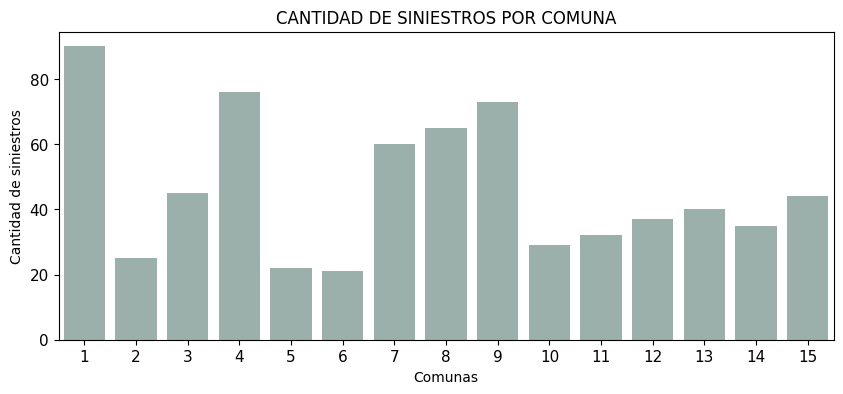

In [97]:
plt.figure(figsize=(10, 4))

sns.countplot(data=homicidios_hechos, x='Comuna', order=range(1, 16), color='#99B3AD')

plt.title('CANTIDAD DE SINIESTROS POR COMUNA')

plt.xlabel('Comunas')
plt.ylabel('Cantidad de siniestros')

plt.xticks(fontsize= 11)
plt.yticks(fontsize= 11)

plt.show()

*El TOP 3 de comunas con mayor cantidad de siniestros viales son las comunas `1`, `4` y `9`, con una diferencia importante con respecto a las demas.*

In [54]:
homicidios_hechos_ = homicidios_hechos[homicidios_hechos['Barrio'] != '']

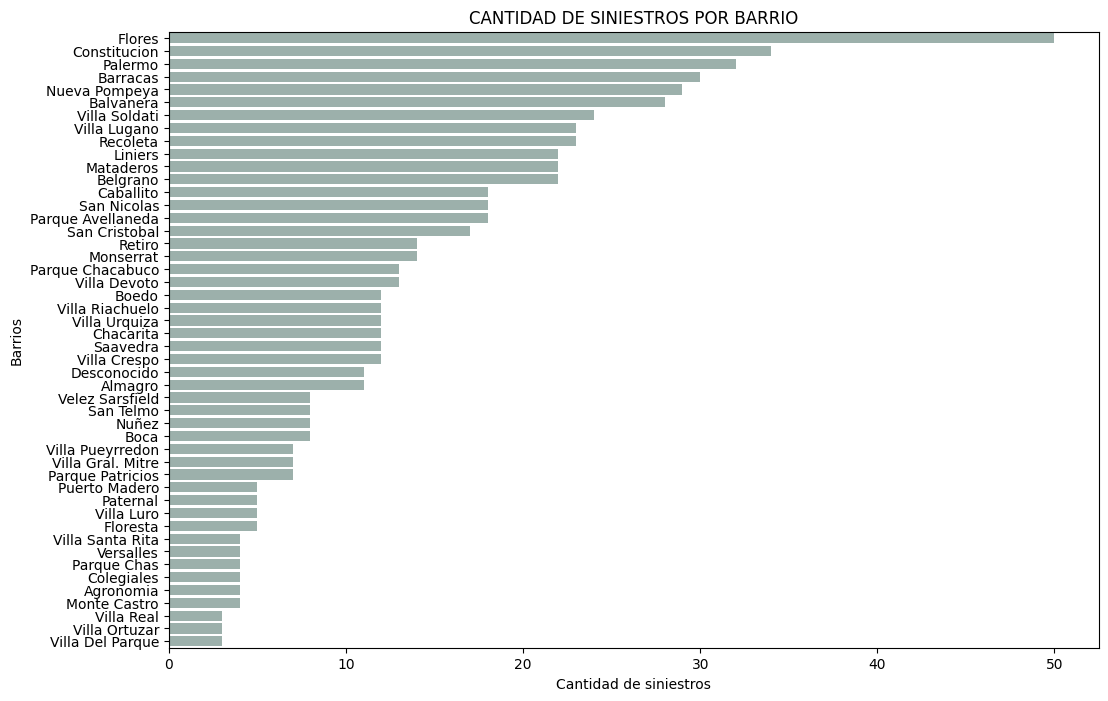

In [98]:
plt.figure(figsize=(12, 8))

sns.countplot(data=homicidios_hechos_, y='Barrio', order= homicidios_hechos_['Barrio'].value_counts().index, color='#99B3AD')

plt.title('CANTIDAD DE SINIESTROS POR BARRIO')

plt.xlabel('Cantidad de siniestros')
plt.ylabel('Barrios')

plt.show()

*Podemos ver que el TOP 3 de barrios de la Ciudad de Buenos Aires con mayor ocurrencia de siniestros viales son: `Flores`, `Constitución` y `Palermo`.*

***Distribución de siniestros por día de la semana***

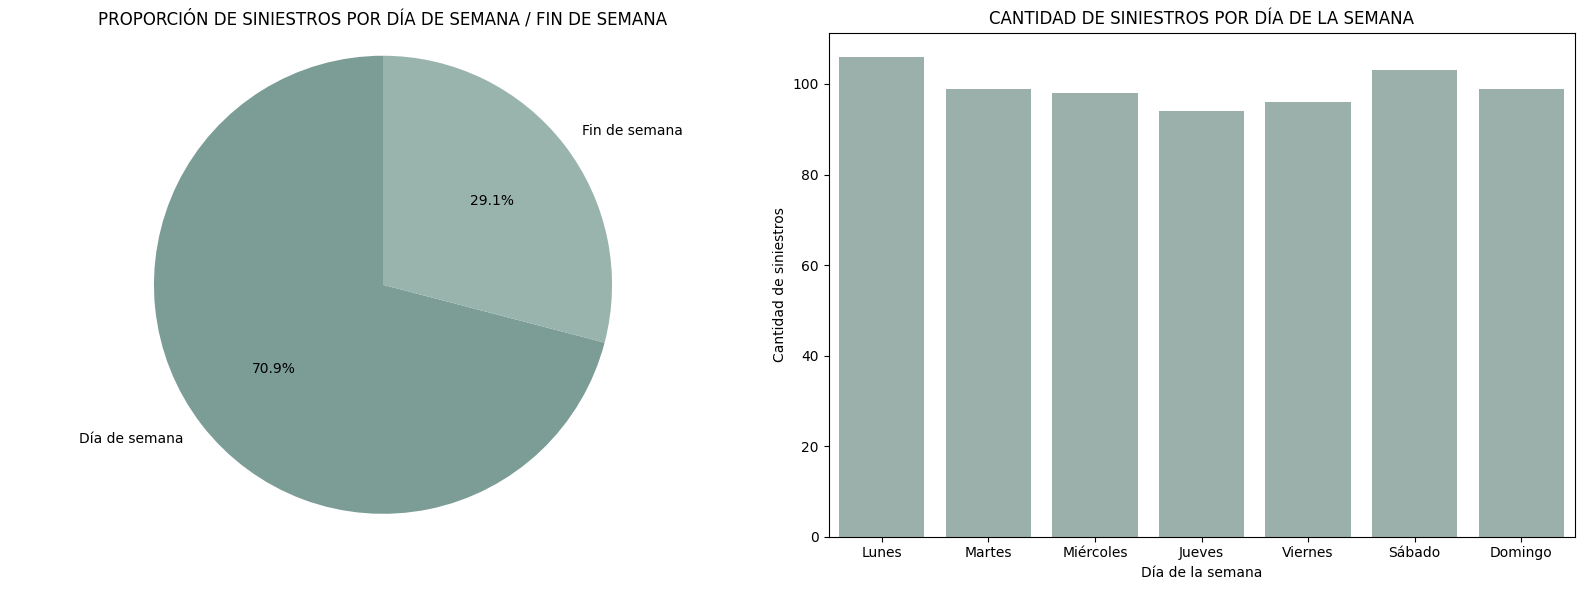

In [111]:

hechos_por_dia_semana = homicidios_hechos['División semana'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))


ax1.pie(hechos_por_dia_semana, labels=hechos_por_dia_semana.index, autopct='%1.1f%%', startangle=90, colors=['#7C9D96', '#99B3AD'])
ax1.set_title('PROPORCIÓN DE SINIESTROS POR DÍA DE SEMANA / FIN DE SEMANA')
ax1.axis('equal')  


sns.countplot(data=homicidios_hechos, x='Nombre día', ax=ax2, order=dias.values(), color='#99B3AD')
ax2.set_title('CANTIDAD DE SINIESTROS POR DÍA DE LA SEMANA')
ax2.set_xlabel('Día de la semana')
ax2.set_ylabel('Cantidad de siniestros')


plt.tight_layout()
plt.show()


*Se observa que el 70.9% de los siniestros viales ocurren en `Días de semana`, mientras que el 29.1% ocurren durante el `Fin de semana`. Si solo se analiza el gráfico de torta, podría sugerirse la necesidad de tomar medidas para reducir el riesgo de siniestros viales, especialmente durante los días de semana, donde hay un mayor porcentaje de incidentes. Sin embargo, al examinar detenidamente la cantidad de siniestros en cada día de la semana, se observa que, si bien el `Lunes` es el día con mayor cantidad de siniestros, no hay una diferencia demasiado notoria con el resto de los días. Por lo tanto, las medidas para reducir la cantidad de siniestros viales deberían ser igualmente efectivas tanto para los días de semana como para los fines de semana.*

***Cantidad de siniestros por mes***

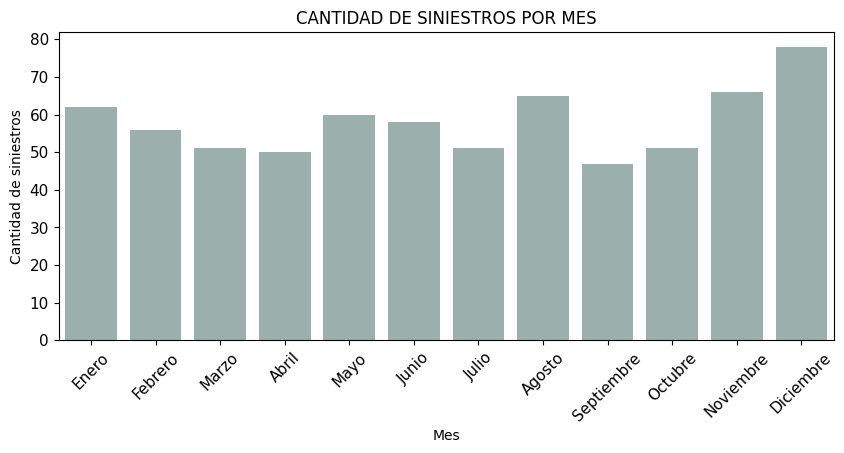

In [101]:
plt.figure(figsize=(10, 4))

sns.countplot(data=homicidios_hechos, x='Mes', color='#99B3AD')

plt.title('CANTIDAD DE SINIESTROS POR MES')

plt.xlabel('Mes')
plt.ylabel('Cantidad de siniestros')

plt.xticks(fontsize= 11)
plt.yticks(fontsize= 11)


plt.xticks(rotation=45)

plt.show()

*Se observa que el mes con la mayor cantidad de siniestros viales es `Diciembre`, seguido por `Noviembre` y `Agosto`, con una diferencia mínima entre estos últimos. El hecho de que Diciembre sea el mes con mayor cantidad de siniestros viales, podría atribuirse al cansancio y estrés acumulado a lo largo del año, así como a las festividades propias de ese mes. Además, es posible que factores como el aumento en el consumo de alcohol debido a celebraciones, la ansiedad por las vacaciones y otros factores contribuyan a esta tendencia. Todo esto podría reflejarse en un comportamiento menos precavido al volante durante este período*

***Distribución de siniestros por mes, en los distintos años***

*Creamos una lista con los meses de manera ordenada, para una mejor visualización.*

In [58]:
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

In [59]:
homicidios_hechos['Mes'] = pd.Categorical(homicidios_hechos['Mes'], categories=orden_meses, ordered=True)

In [60]:
años = homicidios_hechos['Año'].unique()

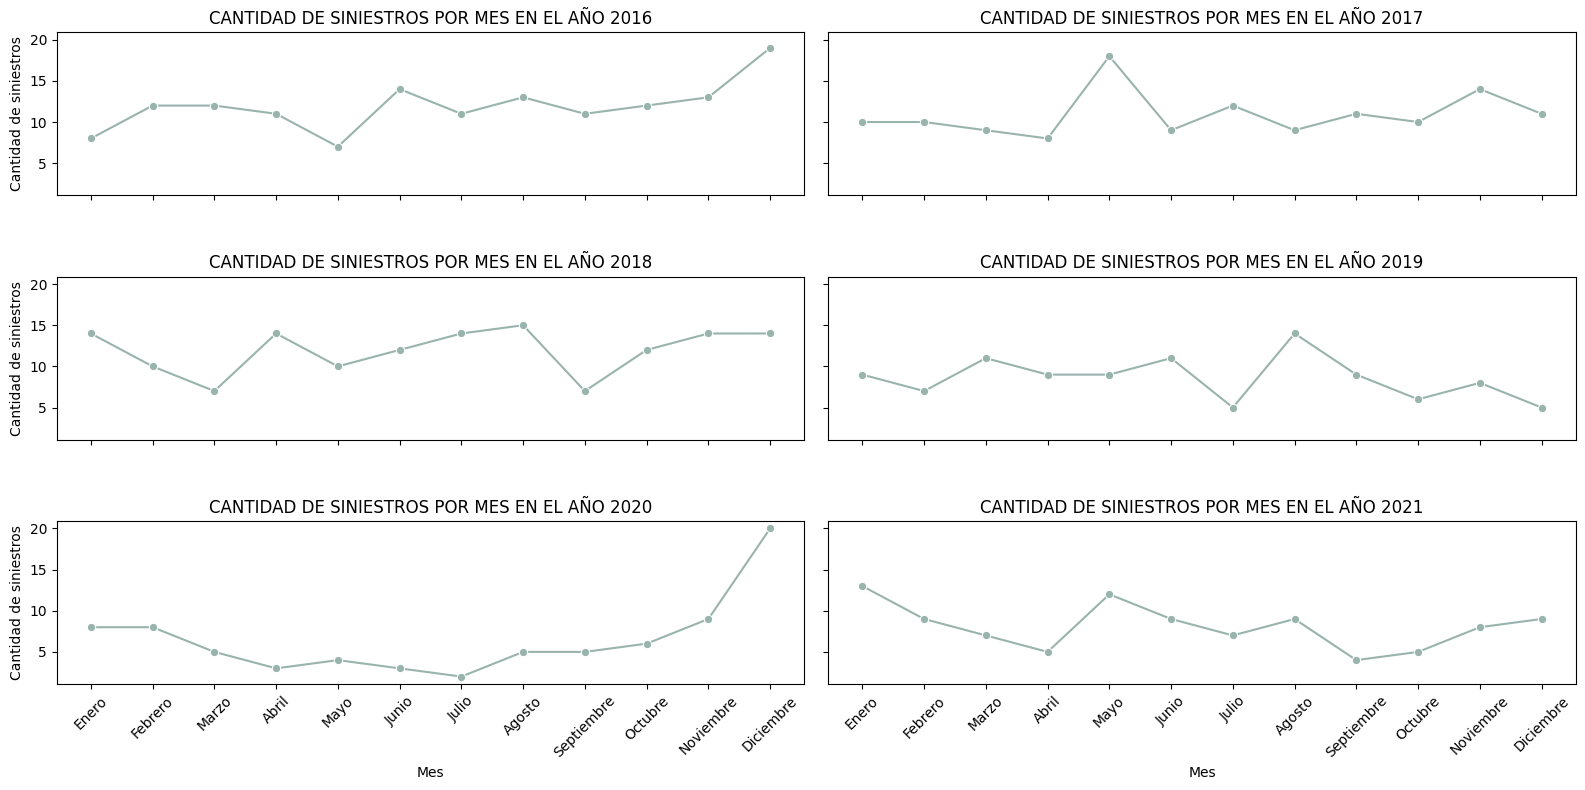

In [102]:
fig, axes = plt.subplots(3, 2, figsize=(16, 8), sharex=True, sharey=True)

for i, año in enumerate(años):

    datos_año = homicidios_hechos[homicidios_hechos['Año'] == año]

    siniestros_por_mes = datos_año['Mes'].value_counts().reindex(orden_meses)

    sns.lineplot(x=siniestros_por_mes.index, y=siniestros_por_mes.values, marker='o', ax=axes[i // 2, i % 2], color='#99B3AD')
    axes[i // 2, i % 2].set_title(f'CANTIDAD DE SINIESTROS POR MES EN EL AÑO {año}')
    axes[i // 2, i % 2].set_xlabel('Mes')
    axes[i // 2, i % 2].set_ylabel('Cantidad de siniestros')
    axes[i // 2, i % 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

warnings.filterwarnings("ignore", "use_inf_as_na")


*Anteriormente analizamos que el mes con la mayor cantidad de siniestros viales con víctimas fallecidas fue diciembre, obteniendo este resultado al sumar los siniestros durante el periodo de 2016 a 2021 y agruparlos por mes. Sin embargo, al examinar más detenidamente año por año, observamos que diciembre no fue siempre el mes con más siniestros. En los años 2016 y 2020, efectivamente, diciembre fue el mes con más siniestros.*

*En 2017, mayo fue el mes con más siniestros, mientras que diciembre presentaba una disminución respecto al mes anterior. En los años 2018 y 2019, agosto fue el mes con más siniestros, y en diciembre se registró un número igual o menor de siniestros en comparación con el mes anterior, respectivamente.*

*En cuanto al año 2020, finalizó con un número muy alto de siniestros y un pico notable. Aunque en enero de 2021 fue el mes con más siniestros, la cifra disminuyó casi a la mitad con respecto a diciembre de 2020.*

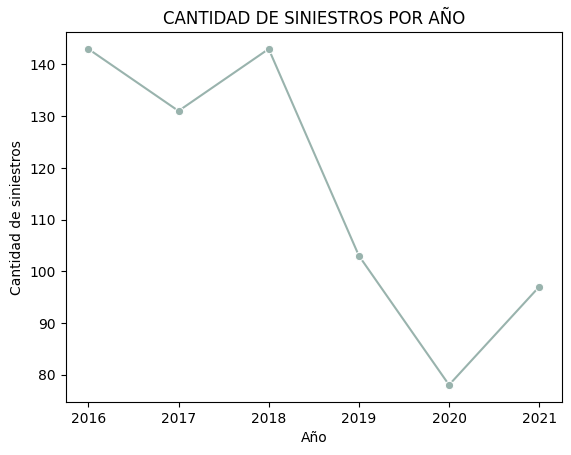

In [173]:
siniestros_por_año = homicidios_hechos['Año'].value_counts().sort_index()

sns.lineplot(x=siniestros_por_año.index, y=siniestros_por_año.values, marker='o', color='#99B3AD')

plt.title('CANTIDAD DE SINIESTROS POR AÑO')

plt.xlabel('Año')
plt.ylabel('Cantidad de siniestros')

plt.show()

*Se observa que los años con mayor cantidad de siniestros fueron 2016 y 2018, seguidos por una tendencia descendente. Este cambio podría deberse a diversas causas, entre las que se destaca el inicio de la pandemia por COVID-19 y las medidas preventivas implementadas. El confinamiento y las restricciones de movilidad redujeron significativamente el tráfico vehicular, lo que contribuyó a la disminución de los siniestros viales.*

***Cantidad de siniestros en horas del día***

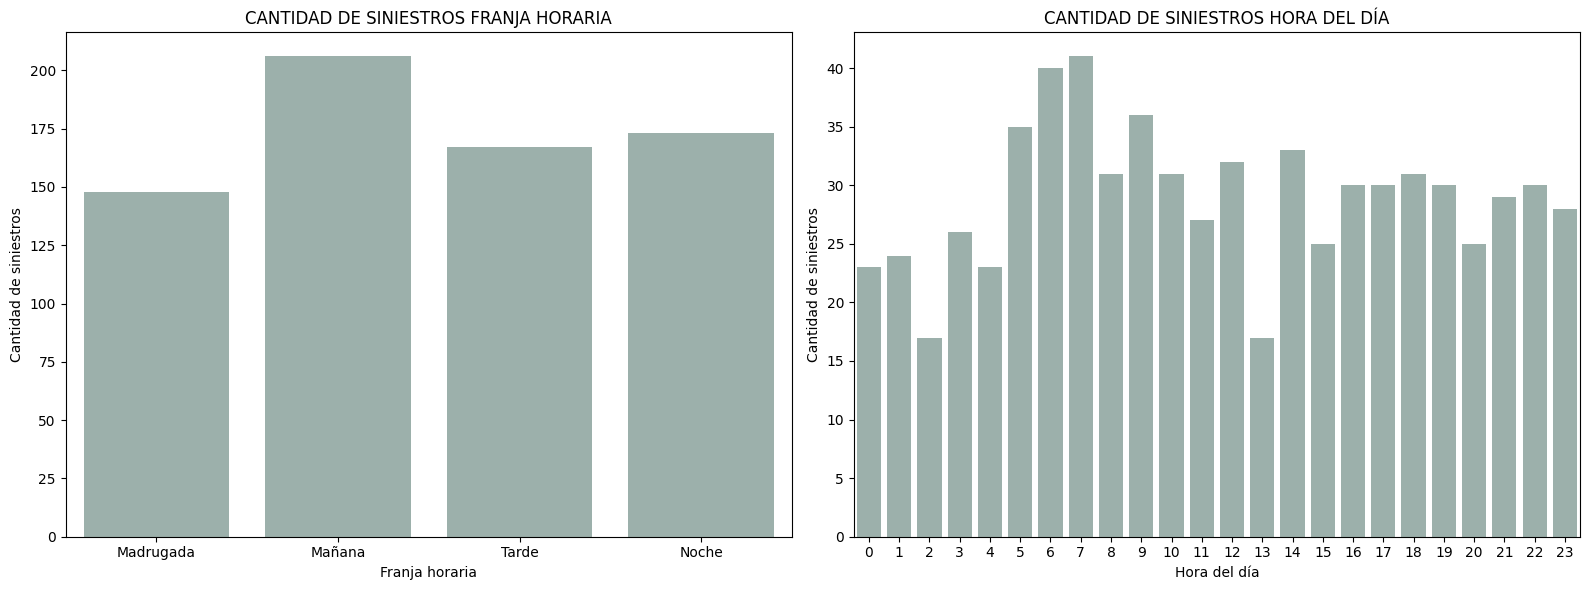

In [104]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(data=homicidios_hechos, x='Momento día', ax=ax1, color='#99B3AD')
ax1.set_title('CANTIDAD DE SINIESTROS FRANJA HORARIA')
ax1.set_xlabel('Franja horaria')
ax1.set_ylabel('Cantidad de siniestros')

sns.countplot(data=homicidios_hechos, x='Franja horaria', ax=ax2, order= range(0, 24), color='#99B3AD')
ax2.set_title('CANTIDAD DE SINIESTROS HORA DEL DÍA')
ax2.set_xlabel('Hora del día')
ax2.set_ylabel('Cantidad de siniestros')

plt.tight_layout()
plt.show()

*Podemos observar que la mayor cantidad de siniestros viales con víctimas fatales ocurrieron durante la mañana. Específicamente, entre las 7 y las 8 de la mañana fue cuando se registró el mayor número de siniestros viales. Este fenómeno podría atribuirse al horario de entrada a las escuelas y lugares de trabajo, que suele ser en esa franja horaria, considerada hora pico. La prisa por llegar temprano y rápidamente a destino podría contribuir a la ocurrencia de estos accidentes.*

***Distribución de siniestros por tipo de acusado***

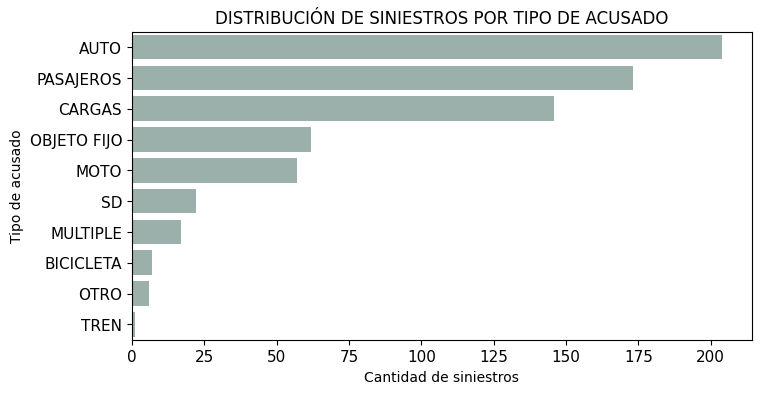

In [105]:
plt.figure(figsize=(8, 4))

sns.countplot(data=homicidios_hechos, y='Acusado', order=homicidios_hechos['Acusado'].value_counts().index, color='#99B3AD')

plt.title('DISTRIBUCIÓN DE SINIESTROS POR TIPO DE ACUSADO')

plt.xlabel('Cantidad de siniestros')
plt.ylabel('Tipo de acusado')

plt.xticks(fontsize= 11)
plt.yticks(fontsize= 11)

plt.show()

*Podemos ver claramente que el acusado de la mayor cantidad de siniestros viales con victimas fatales, es `Auto`, causando más de 200 siniestros. Seguido por `Pasajero` en segundo lugar y `Cargas`, en tercer lugar.*

***Distribución de siniestros por tipo de calle***

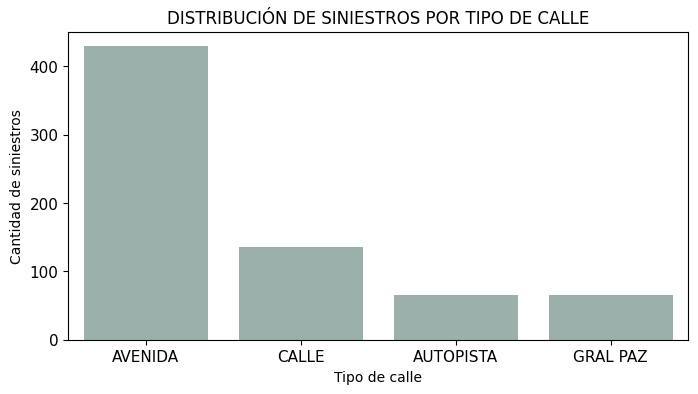

In [106]:
plt.figure(figsize=(8, 4))

sns.countplot(data=homicidios_hechos, x='Tipo calle', order=homicidios_hechos['Tipo calle'].value_counts().index, color='#99B3AD')

plt.title('DISTRIBUCIÓN DE SINIESTROS POR TIPO DE CALLE')

plt.xlabel('Tipo de calle')
plt.ylabel('Cantidad de siniestros')

plt.xticks(fontsize= 11)
plt.yticks(fontsize= 11)

plt.show()

*La mayor parte de los siniestros viales, sobrepasando ampliamente el resto de los tipos de calle, ocurrieron sobre una `Avenida`. Esto podria deberse a que la combinación de mayor tráfico, velocidades más altas, mayor número de intersecciones y doble sentido, a diferencia de las calles, que generalmente tienen uno, hacen que las avenidas sean más propensas a tener accidentes en comparación con calles o autopistas.*

#### Análisis exploratorio del DataFrame **homicidios_victimas**:

#### Información general:

In [65]:
homicidios_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


#### Normalizamos las columnas del DataFrame:

In [66]:
f.normalizacion_columnas(homicidios_victimas)

,Id_Hecho,Fecha,Aaaa,Mm,Dd,Rol,Victima,Sexo,Edad,Fecha_Fallecimiento
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


#### Cambiamos el nombre de sus columnas:

In [67]:
homicidios_victimas.rename(columns = {'Id_Hecho':'ID hecho','Aaaa': 'Año', 'Mm': 'Mes', 'Dd': 'Día', 'Fecha_Fallecimiento': 'Fecha de fallecimiento'}, inplace = True)

#### Resumen estadistico:

In [68]:
homicidios_victimas.describe(include='all')

,ID hecho,Fecha,Año,Mes,Día,Rol,Victima,Sexo,Edad,Fecha de fallecimiento
count,717,717,717.000000,717.000000,717.000000,717,717,717,717,717
unique,696,NaN,NaN,NaN,NaN,5,8,3,86,563
top,2017-0035,NaN,NaN,NaN,NaN,CONDUCTOR,MOTO,MASCULINO,SD,SD
freq,3,NaN,NaN,NaN,NaN,330,303,545,53,68
mean,NaN,2018-09-09 01:36:24.100418304,2018.174338,6.688982,15.960948,NaN,NaN,NaN,NaN,NaN
min,NaN,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2017-04-01 00:00:00,2017.000000,4.000000,9.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2018-07-07 00:00:00,2018.000000,7.000000,16.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2019-12-18 00:00:00,2019.000000,10.000000,23.000000,NaN,NaN,NaN,NaN,NaN
max,NaN,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,NaN,NaN,NaN,NaN,NaN


*Del resumen estadistico del DataFrame **homicidios_victimas** podemos ver (aparte de lo que vimos en el resumen estadistico del Dataframe **homicidios_hechos**), que el **Rol** con mayor ocurrencias es `Conductor`, que el **Sexo** con mayor frecuencia es `Masculino` y podriamos ver si nuestros datos de las columnas **Edad** y **Fecha de fallecimiento** son validos para el análisis, ya que podemos ver que el valor con mayor frecuencia es `SD` en ambas.*

#### Porcentaje de valores nulos por columna:

In [69]:
f.porcentaje_valores_nulos(homicidios_victimas)

La columna ID hecho tiene un  0.00 % de valores nulos
La columna Fecha tiene un  0.00 % de valores nulos
La columna Año tiene un  0.00 % de valores nulos
La columna Mes tiene un  0.00 % de valores nulos
La columna Día tiene un  0.00 % de valores nulos
La columna Rol tiene un  0.00 % de valores nulos
La columna Victima tiene un  0.00 % de valores nulos
La columna Sexo tiene un  0.00 % de valores nulos
La columna Edad tiene un  0.00 % de valores nulos
La columna Fecha de fallecimiento tiene un  0.00 % de valores nulos


*Ninguna columna de este DataFrame posee valores faltantes.*

#### Porcentaje de valores "SD" por columna:

*Aparte de calcular el porcentaje de valores nulos por columna, analizaremos los valores iguales a **SD**, ya que estos a pesar de estar presentes, no nos brindan información relevante. Cuando se trata de direcciones, comunas, ubicaciones de donde ocurrieron los hechos, etc, podemos llegar a recuperar esa información de alguna manera (desde otras columnas, mediante Web Scraping en paginas web, mediante la API de GoogleMaps, etc), pero cuando se trata de datos sobre las victimas, recuperar esa información con exactitud no es posible. Asique veremos si el porcentaje de valores iguales a **SD** es bajo o cero, como para poder llevar a cabo nuestro análisis utilizando todas las columnas.*

In [70]:
f.porcentaje_valores_sd(homicidios_victimas)

La columna ID hecho tiene un  0.00 % de valores "SD"
La columna Fecha tiene un  0.00 % de valores "SD"
La columna Año tiene un  0.00 % de valores "SD"
La columna Mes tiene un  0.00 % de valores "SD"
La columna Día tiene un  0.00 % de valores "SD"
La columna Rol tiene un  1.53 % de valores "SD"
La columna Victima tiene un  1.26 % de valores "SD"
La columna Sexo tiene un  0.84 % de valores "SD"
La columna Edad tiene un  7.39 % de valores "SD"
La columna Fecha de fallecimiento tiene un  9.48 % de valores "SD"


*Vemos que la columna con mayor porcentaje de valores nulos es **Fecha de fallecimiento**. Esto probablemente se deba a que la persona fallecida, no murio en el momento del siniestro y lo hizo días posteriores. El resto de las columnas tienen un porcentaje igual a cero, o tienen un porcentaje muy bajo, por debajo del 10%. Asique podremos utilizar esas columnas, en caso de ser necesario, para nuestro análisis.*

#### Conteo de ocurrencias unicas en variables categoricas:

In [71]:
homicidios_victimas['Rol'].value_counts()

Rol
CONDUCTOR               330
PEATON                  267
PASAJERO_ACOMPAÑANTE     80
CICLISTA                 29
SD                       11
Name: count, dtype: int64

In [72]:
homicidios_victimas['Victima'].value_counts()

Victima
MOTO         303
PEATON       267
AUTO          94
BICICLETA     29
SD             9
CARGAS         7
PASAJEROS      5
MOVIL          3
Name: count, dtype: int64

In [73]:
homicidios_victimas['Sexo'].value_counts()

Sexo
MASCULINO    545
FEMENINO     166
SD             6
Name: count, dtype: int64

In [74]:
homicidios_victimas['Edad'].value_counts()

Edad
SD    53
30    28
29    24
23    24
27    20
      ..
11     1
13     1
85     1
7      1
88     1
Name: count, Length: 86, dtype: int64

#### Registros duplicados:

In [75]:
f.registros_duplicados(homicidios_victimas)

,ID hecho,Fecha,Año,Mes,Día,Rol,Victima,Sexo,Edad,Fecha de fallecimiento


*No tenemos ningún regristro duplicado en este DataFrame.*

#### Tipo de dato de las columnas del DataFrame:

In [76]:
f.tipo_de_datos(homicidios_victimas)

,Nombre de la columna,Tipo de dato
0,ID hecho,[<class 'str'>]
1,Fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...
2,Año,[<class 'int'>]
3,Mes,[<class 'int'>]
4,Día,[<class 'int'>]
5,Rol,[<class 'str'>]
6,Victima,[<class 'str'>]
7,Sexo,[<class 'str'>]
8,Edad,"[<class 'int'>, <class 'str'>]"
9,Fecha de fallecimiento,"[<class 'datetime.datetime'>, <class 'str'>]"


*Vemos que la columna **Edad** tiene dos tipos de datos distintos; analizamos los que tiene tipo de dato **str**, ya que los que tienen tipo de dato **int** estarian en un formato correcto:*

In [77]:
homicidios_victimas[homicidios_victimas['Edad'].apply(lambda x: isinstance(x, str))]

,ID hecho,Fecha,Año,Mes,Día,Rol,Victima,Sexo,Edad,Fecha de fallecimiento
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30 00:00:00
33,2016-0045,2016-04-11,2016,4,11,CONDUCTOR,MOTO,MASCULINO,SD,SD
35,2016-0048,2016-04-15,2016,4,15,PEATON,PEATON,FEMENINO,SD,SD
36,2016-0049,2016-04-17,2016,4,17,SD,SD,SD,SD,SD
39,2016-0052,2016-04-20,2016,4,20,SD,MOTO,SD,SD,SD
55,2016-0077,2016-06-13,2016,6,13,PEATON,PEATON,FEMENINO,SD,SD
63,2016-0085,2016-06-29,2016,6,29,SD,MOTO,MASCULINO,SD,SD
72,2016-0096,2016-07-25,2016,7,25,CONDUCTOR,MOTO,MASCULINO,SD,SD
89,2016-0115,2016-09-02,2016,9,2,SD,SD,MASCULINO,SD,SD
93,2016-0119,2016-09-04,2016,9,4,PASAJERO_ACOMPAÑANTE,SD,FEMENINO,SD,SD


*Los registros de la columna **Edad** con formato **str**, son aquellos de los que no se tiene dato (**SD**), asique los mantenemos de esa forma.*

*Vemos también que la columna **Fecha de fallecimiento**, tiene dos tipos de datos, analizamos tambien los que tienen tipo de dato **str**:*

In [78]:
homicidios_victimas[homicidios_victimas['Fecha de fallecimiento'].apply(lambda x: isinstance(x, str))]

,ID hecho,Fecha,Año,Mes,Día,Rol,Victima,Sexo,Edad,Fecha de fallecimiento
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
16,2016-0022,2016-02-21,2016,2,21,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,41,SD
19,2016-0027,2016-02-28,2016,2,28,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,34,SD
22,2016-0031,2016-03-08,2016,3,8,CONDUCTOR,MOTO,MASCULINO,21,SD
33,2016-0045,2016-04-11,2016,4,11,CONDUCTOR,MOTO,MASCULINO,SD,SD
...,...,...,...,...,...,...,...,...,...,...
242,2017-0112,2017-09-10,2017,9,10,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,1,SD
246,2017-0115,2017-09-19,2017,9,19,CONDUCTOR,MOTO,MASCULINO,34,SD
253,2017-0126,2017-10-14,2017,10,14,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,39,SD
280,2017-0155,2017-12-12,2017,12,12,SD,SD,MASCULINO,77,SD


*La mayor parte de los datos de la columna **Fecha de fallecimiento** con tipo de dato de tipo **str**, son aquellos de los que no se tiene dato disponible (**SD**), sin embargo, también hay una fecha que esta en un formato incorrecto, asique procedemos a corregirla:*

In [79]:
homicidios_victimas['Fecha de fallecimiento'] = pd.to_datetime(homicidios_victimas['Fecha de fallecimiento'], format='%d/%m/%Y', errors='coerce')

In [80]:
homicidios_victimas['Fecha de fallecimiento'][454]

Timestamp('2019-03-26 00:00:00')

#### Tranformaciones:

*Haremos las transformaciones que consideremos necesarias o beneficiosas para nuestro análisis:*

*De la columna **Mes**, cambiamos el número por el nombre del mes:*

In [81]:
homicidios_victimas['Mes'] = homicidios_victimas['Mes'].replace({1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'})

*Creamos una nueva columna **Rango etario**, estableciendo grupos de edades, siendo estos:*
- 0 - 3 años: BEBÉ
- 3 - 16 años: NIÑO/ADOLESCENTE
- 16 - 30 años: JOVEN
- 30 - 60 años: ADULTO
- 60 años en adelante: ADULTO MAYOR

In [82]:
bins = [0, 3, 16, 30, 60, 100]
labels = ['Bebé', 'Niño/Adolescente', 'Joven', 'Adulto', 'Adulto mayor']

homicidios_victimas['Edad'] = pd.to_numeric(homicidios_victimas['Edad'], errors='coerce')
homicidios_victimas['Edad'] = homicidios_victimas['Edad'].fillna(-1).astype(int)
homicidios_victimas['Rango Etario'] = pd.cut(homicidios_victimas['Edad'], bins=bins, labels=labels, right=False)


In [83]:
homicidios_victimas

,ID hecho,Fecha,Año,Mes,Día,Rol,Victima,Sexo,Edad,Fecha de fallecimiento,Rango Etario
0,2016-0001,2016-01-01,2016,Enero,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01,Joven
1,2016-0002,2016-01-02,2016,Enero,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02,Adulto mayor
2,2016-0003,2016-01-03,2016,Enero,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03,Adulto
3,2016-0004,2016-01-10,2016,Enero,10,CONDUCTOR,MOTO,MASCULINO,18,NaT,Joven
4,2016-0005,2016-01-21,2016,Enero,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01,Joven
...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,Diciembre,12,PEATON,PEATON,FEMENINO,50,2021-12-12,Adulto
713,2021-0093,2021-12-13,2021,Diciembre,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18,Joven
714,2021-0094,2021-12-20,2021,Diciembre,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20,Adulto
715,2021-0095,2021-12-30,2021,Diciembre,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02,Joven


*Para definir los grupos de acuerdo a las edades, tuvimos que convertir los valores **SD** a **-1**, asique una vez definidos los grupos, regresamos los valores **-1** a **SD**:*

In [84]:
homicidios_victimas['Edad'] = homicidios_victimas['Edad'].replace(-1, 'SD')

*Veamos el conteo de esta variable categorica:*

In [85]:
homicidios_victimas['Rango Etario'].value_counts()

Rango Etario
Adulto              304
Joven               208
Adulto mayor        139
Niño/Adolescente     11
Bebé                  2
Name: count, dtype: int64

### Gráficos:

***Distribución de víctimas por rango etario***

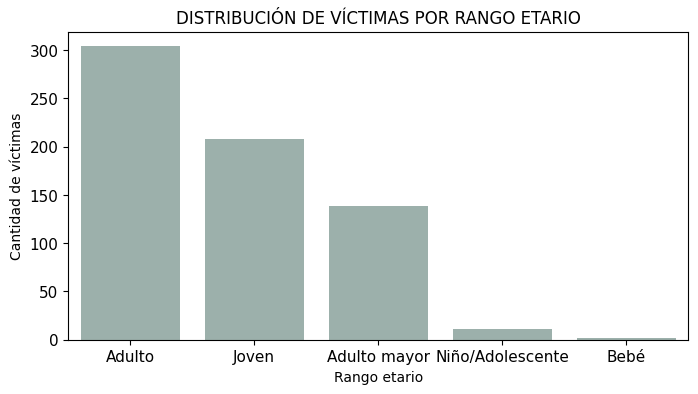

In [107]:
plt.figure(figsize=(8, 4))

sns.countplot(data=homicidios_victimas, x='Rango Etario', order=homicidios_victimas['Rango Etario'].value_counts().index, color='#99B3AD')

plt.title('DISTRIBUCIÓN DE VÍCTIMAS POR RANGO ETARIO')


plt.xlabel('Rango etario')
plt.ylabel('Cantidad de víctimas')

plt.xticks(fontsize= 11)
plt.yticks(fontsize= 11)

plt.show()

`Referencias:` 
- *Bebé: 0 - 3 años*
- *Niño/Adolescente: 3 - 16 años*
- *Joven: 16 - 30 años*
- *Adulto: 30 - 60 años*
- *Adulto mayor: 60 en adelante*

*Se analizaron las edades de las víctimas fatales de siniestros viales, divididas en rangos etarios, y se observó que el grupo más afectado, con un poco más de 300 víctimas, corresponde al rango etario `Adulto` (entre 30 y 60 años). Este hallazgo podría atribuirse a que este grupo de edad suele ser más activo en términos de movilidad y participación en el tráfico, lo que aumenta su exposición al riesgo de sufrir accidentes viales.*

***Distribución de víctimas por sexo***

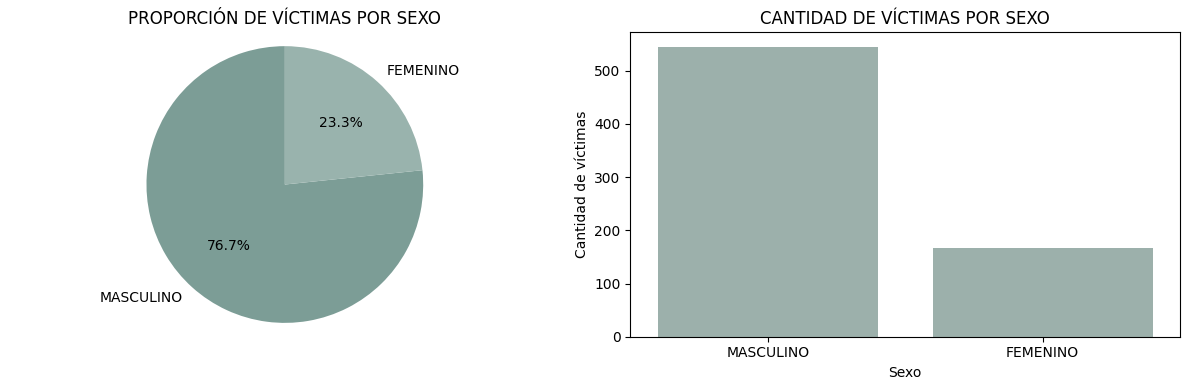

In [110]:
sexo = homicidios_victimas[homicidios_victimas['Sexo'] != 'SD']

sexo_values = sexo['Sexo'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))


ax1.pie(sexo_values, labels=sexo_values.index, autopct='%1.1f%%', startangle=90, colors=['#7C9D96', '#99B3AD'])
ax1.set_title('PROPORCIÓN DE VÍCTIMAS POR SEXO')
ax1.axis('equal')  


sns.countplot(data=sexo, x='Sexo', order=sexo['Sexo'].value_counts().index, color='#99B3AD')
ax2.set_title('CANTIDAD DE VÍCTIMAS POR SEXO')
ax2.set_xlabel('Sexo')
ax2.set_ylabel('Cantidad de víctimas')


plt.tight_layout()
plt.show()

*Se observa que el mayor porcentaje de víctimas son de sexo `MASCULINO`, representando un 76.7% del total, lo que equivale a más de 550 víctimas. Por otro lado, el sexo `FEMENINO` representan un 23.3% del total, con un poco más de 150 víctimas. Esta diferencia en la distribución de género en las víctimas de siniestros viales puede deberse a diversos factores, como los comportamientos de riesgo al conducir, la exposición diferencial a situaciones de tráfico peligrosas o la distribución de roles de género en la movilidad urbana.*

***Distribución de víctimas por rol***

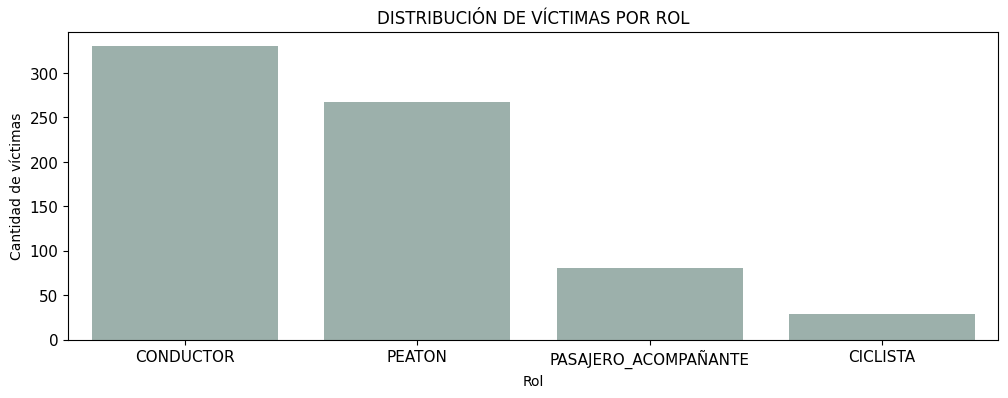

In [113]:
rol = homicidios_victimas[homicidios_victimas['Rol'] != 'SD']

rol_values = rol['Rol'].value_counts()

plt.figure(figsize=(12, 4))

sns.countplot(data=rol, x='Rol', order=rol['Rol'].value_counts().index, color='#99B3AD')

plt.title('DISTRIBUCIÓN DE VÍCTIMAS POR ROL')

plt.xlabel('Rol')
plt.ylabel('Cantidad de víctimas')

plt.xticks(fontsize= 11)
plt.yticks(fontsize= 11)

plt.show()

*Se observa que el rol con la mayor cantidad de víctimas, superando las 350, es el de `CONDUCTOR`, seguido por el rol de `PEATON` con una diferencia de aproximadamente 100 víctimas. Esta distribución resalta la importancia de la seguridad vial tanto para los conductores como para los peatones, y sugiere la necesidad de medidas para proteger a ambos grupos en las vías públicas.*

***Distribución de víctimas por tipo de víctima***

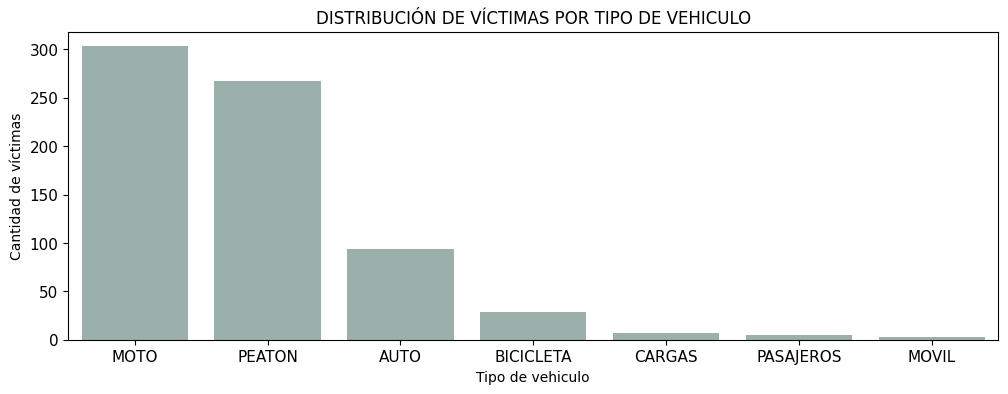

In [114]:
victima = homicidios_victimas[homicidios_victimas['Victima'] != 'SD']

victima_values = victima['Victima'].value_counts()

plt.figure(figsize=(12, 4))

sns.countplot(data=victima, x='Victima', order=victima['Victima'].value_counts().index, color='#99B3AD')

plt.title('DISTRIBUCIÓN DE VÍCTIMAS POR TIPO DE VEHICULO')

plt.xlabel('Tipo de vehiculo')
plt.ylabel('Cantidad de víctimas')

plt.xticks(fontsize= 11)
plt.yticks(fontsize= 11)

plt.show()

*Al analizar la distribución de víctimas por tipo de vehículo, se observa que el tipo con la mayor cantidad de víctimas es `MOTO`, seguido por `PEATON` y en tercer lugar se encuentra `AUTO`. Los demás tipos de vehículos (bicicleta, cargas, pasajeros, móvil) se encuentran en último lugar, con una diferencia notable respecto a los primeros tres.*

*Que el tipo de vehículo ocupado por las víctimas que se posiciona en primer lugar sea la moto podria deberse a diversas razones. Entre ellas, se encuentran las altas velocidades alcanzadas por este medio de movilidad, la falta de uso de casco, la sobreocupación del vehículo y otros comportamientos de riesgo asociados con los conductores de motocicletas.*

*Por otro lado, que los peatones se encuentren en segundo lugar puede deberse a que, en ocasiones, no respetan las señales de stop o cruzan calles con semáforos en verde para los vehículos, además de la tendencia a posicionarse sobre la calle en lugar de hacerlo sobre la vereda. Estos comportamientos aumentan su vulnerabilidad frente a los siniestros viales.*

#### Guardado de los archivos limpios y analizados:

In [90]:
homicidios_hechos.to_excel('Data/homicidios_hechos_limpio.xlsx', index=False)

In [91]:
homicidios_victimas.to_excel('Data/homicidios_victimas_limpio.xlsx', index=False)

In [95]:
diccionario_hechos.to_excel('Data/diccionario_hechos.xlsx', index=False)

In [96]:
diccionario_victimas.to_excel('Data/diccionario_victimas.xlsx', index=False)